# 简单线性回归

简单线性模型，就是一阶线性回归。

简单线性回归：   
- 模型：y=a*x+b
- 代价函数：J=$ \sum_{i=1}^{m}(a*x+b-y)^2 $ 
- a=$ \frac{\sum_{i=1}^{m}(x-\bar x)*(y-\bar y)}{(\sum_{i=1}^{m}(x-\bar x)^2}$    
 or  a=$ \frac{(X-\bar X).(Y-\bar Y)}{(X-\bar X)^2} $
- b=$ \bar y-a*\bar x $

In [13]:
import numpy as np


class simplelinear:
    def __init__(self):
        self.a_ = None
        self.b_ = None

    def fit(self, x_train, y_train):
        x_mean = np.mean(x_train)
        y_mean = np.mean(y_train)
        nums = 0
        d = 0
#          for x, y in zip(x_train, y_train):
#             num += (x - x_mean) * (y - y_mean)
#             d += (x - x_mean) ** 2
        # 正规方程解
        self.a_ = (x_train-x_mean).dot(y_train-y_mean) / \
            (x_train - x_mean).dot(x_train - x_mean)
        self.b_ = y_mean-self.a_*x_mean
        return self

    def predict_(self, x_test):

        y_predict = [self.a_*x+self.b_ for x in x_test]
        return np.array(y_predict)

In [3]:
x = np.array([1., 2., 3., 4., 5.])
y = np.array([1., 3., 2., 3., 5.])

In [14]:
simple=simplelinear()
simple.fit(x,y)
simple.predict_(x)


array([1.2, 2. , 2.8, 3.6, 4.4])

In [18]:
simple.a_

0.8

In [19]:
simple.b_

0.39999999999999947

In [20]:
import matplotlib.pyplot as plt

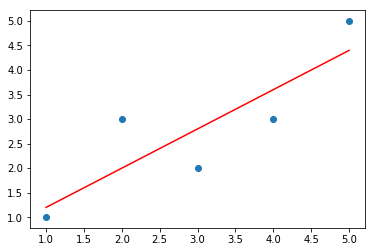

In [21]:
plt.scatter(x, y)
plt.plot(x, simple.predict_(x), color='r')
plt.show()

# 多元线性回归

多元线性回归可写成:

$\hat{y}(\theta, x) = \theta_0 + \theta_1 x^1 +\theta_2 x^2 +\theta_3 x^3 +\theta_4 x^4 +...+\theta_n x^n$  

也可写成：  

$\hat{Y}=X.\theta$

$\hat{Y^i} = X^i.\theta$  
其中，$\theta=(\theta_0,...,\theta_n)^\top$ 是$n\times1$的列向量  
$X^i=(1,x^1,...,x^n)$ ,X为 $m\times n$ 的矩阵

代价函数：$J(\theta,X)= \sum_{i=0}^n (Y^i-\hat{Y^i})^\top.(Y^i-\hat{Y^i})$

正规方程解：$\theta=inv(X_b^\top X_b)X_b^\top Y$

In [11]:
# 根据上述表达得到如下代码
import numpy as np


class Linear:
    def __inint__(self):
        self.coef_ = None
        self.intercept_ = None
        self.theta_ = None

    def fit(self, x_train, y_train):
        x_b = np.hstack([np.ones((len(x_train), 1)), x_train])
#         同理，正规方程解
        self.theta_ = np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y_train)
        self.intercept_ = self.theta_[0]
        self.coef_ = self.theta_[1:]

        return self

    def predict(self, x_predict):
        x_b = np.hstack([np.ones((len(x_predict), 1)), x_predict])
        return x_b.dot(self.theta_)

In [6]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
boston = datasets.load_boston()

X = boston.data
y = boston.target

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [12]:
reg=Linear()
reg.fit(X_train, y_train)

In [13]:
reg.coef_

array([-1.30356663e-01,  4.36387787e-02,  2.21747594e-02,  3.17396478e+00,
       -1.76672950e+01,  3.84628517e+00, -4.92171802e-03, -1.37010653e+00,
        2.84824614e-01, -1.08997373e-02, -9.47411635e-01,  1.06620242e-02,
       -4.57622903e-01])

In [14]:
reg.intercept_

34.18041338505329

# sklearn 学习

## 普通最小二乘   
- sklearn.linear_model.LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=None)    
         参数：	
        fit_intercept ： boolean，optional，默认为True
        是否计算此模型的截距。如果设置为False，则不会在计算中使用截距（例如，预计数据已经居中）。

        normalize ： 布尔值，可选，默认为False
        fit_intercept设置为False 时，将忽略此参数。如果为True，则回归量X将在回归之前通过减去平均值并除以l2范数来归一化。如果您希望标准化，请 在使用估算器sklearn.preprocessing.StandardScaler之前fit使用normalize=False。

        copy_X ： 布尔值，可选，默认为True
        如果为True，则将复制X; 否则，它可能会被覆盖。

        n_jobs ： int或None，可选（默认=无）
        用于计算的作业数。这只会为n_targets> 1和足够大的问题提供加速。 None除非在joblib.parallel_backend上下文中，否则表示1 。 -1表示使用所有处理器。有关 详细信息，请参阅词汇表。

        属性：	
        coef_ ： array，shape（n_features，）或（n_targets，n_features）
        线性回归问题的估计系数。如果在拟合期间传递多个目标（y 2D），则这是形状的二维数组（n_targets，n_features），而如果仅传递一个目标，则这是长度为n_features的一维数组。

        intercept_ ： array
        线性模型中的独立项。



In [22]:
from sklearn import linear_model

In [24]:
reg = linear_model.LinearRegression()
a=[[1,1],[2,3],[3,2],[4,3],[5,5]]
reg.fit(a,x)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [25]:
reg.coef_

array([1.00000000e+00, 1.40433339e-16])

In [29]:
reg.predict([[5,6]])

array([5.])

## 岭回归 
Ridge 回归通过对系数的大小施加惩罚来解决 普通最小二乘法 的一些问题。 岭系数最小化的是带罚项的残差平方和，

$ \underset{w}{min\,} {{|| X w - y||_2}^2 + \alpha {||w||_2}^2}$

其中， $\alpha \geq 0 $是控制系数收缩量的复杂性参数： $\alpha$ 的值越大，收缩量越大，模型对共线性的鲁棒性也更强。

sklearn.linear_model.Ridge(alpha=1.0, fit_intercept=True, normalize=False, copy_X=True, max_iter=None, tol=0.001, solver=’auto’, random_state=None)

    max_iter ： int，可选
    共轭梯度求解器的最大迭代次数。对于'sparse_cg'和'lsqr'解算器，默认值由scipy.sparse.linalg确定。对于'sag'解算器，默认值为1000。

    tol ： float
    解决方案的精确度。

    求解器 ： {'auto'，'svd'，'cholesky'，'lsqr'，'sparse_cg'，'sag'，'saga'}
    求解器用于计算程序：

    'auto'  根据数据类型自动选择求解器。
    'svd'  使用X的奇异值分解来计算岭系数。奇异矩阵比'cholesky'更稳定。
    'cholesky'  使用标准的scipy.linalg.solve函数来获得封闭形式的解决方案。
    'sparse_cg'  使用scipy.sparse.linalg.cg中的共轭梯度求解器。作为迭代算法，此解算器比“cholesky”更适合大规模数据（set tol和max_iter的可能性）。
    'lsqr'  使用专用的正则化最小二乘例程scipy.sparse.linalg.lsqr。它是最快的并且使用迭代过程。
    'sag'  使用随机平均梯度下降，'saga'使用其改进的，无偏见的版本SAGA。这两种方法也使用迭代过程，并且当n_samples和n_features都很大时，它们通常比其他求解器更快。请注意，“sag”和“saga”快速收敛仅在具有大致相同比例的要素上得到保证。您可以使用sklearn.preprocessing中的缩放器预处理数据。
    所有最后五个求解器都支持密集和稀疏数据。但是，当fit_intercept为True 时，只有'sag'和'sparse_cg'支持稀疏输入。
    
    
     random_state ： int，RandomState实例或None，可选，默认无
    伪随机数生成器的种子，用于在混洗数据时使用。如果是int，则random_state是随机数生成器使用的种子; 如果是RandomState实例，则random_state是随机数生成器; 如果为None，则随机数生成器是由其使用的RandomState实例np.random。在solver=='sag'时使用。

In [30]:
from sklearn import linear_model
reg = linear_model.Ridge (alpha = .5)
reg.fit ([[0, 0], [0, 0], [1, 1]], [0, .1, 1])

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [31]:
reg.coef_

array([0.34545455, 0.34545455])

In [32]:
reg.intercept_

0.1363636363636364

RidgeCV 通过内置的关于的 Alpha 参数的交叉验证来实现岭回归。 该对象与 GridSearchCV 的使用方法相同，只是它默认为 Generalized Cross-Validation(广义交叉验证 GCV)，这是一种有效的留一验证方法（LOO-CV）:


In [33]:
reg = linear_model.RidgeCV(alphas=[0.1, 1.0, 10.0])

In [36]:
reg.fit([[0, 0], [0, 0], [1, 1]], [0, .1, 1]) 

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=None, fit_intercept=True,
    gcv_mode=None, normalize=False, scoring=None, store_cv_values=False)

<span class="burk">指定cv属性的值将触发(通过GridSearchCV的)交叉验证，cv=n，即是n次交叉</span>

In [35]:
reg.alpha_  

0.1

## Lasso
Lasso 是拟合稀疏系数的线性模型。 它在一些情况下是有用的，因为它倾向于使用具有较少参数值的情况，有效地减少给定解决方案所依赖变量的数量。 因此，Lasso 及其变体是压缩感知领域的基础。 在一定条件下，它可以恢复一组非零权重的精确集
在数学公式表达上，它由一个带有 \ell_1 先验的正则项的线性模型组成。 其最小化的目标函数是:

$\underset{w}{min\,} { \frac{1}{2n_{samples}} ||X w - y||_2 ^ 2 + \alpha ||w||_1}$

lasso estimate 解决了加上罚项 $\alpha ||w||_1 $的最小二乘法的最小化，其中， $\alpha$ 是一个常数， $||w||_1$ 是参数向量的 $\ell_1-norm$ 范数。



In [39]:
reg = linear_model.Lasso(alpha = 0.1)

In [40]:
reg.fit([[0, 0], [1, 1]], [0, 1])

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [41]:
reg.predict([[1, 1]])

array([0.8])

In [42]:
reg.coef_

array([0.6, 0. ])

In [43]:
reg.intercept_

0.2

In [44]:
reg.score([[0, 0], [1, 1]], [0, 1])

0.8400000000000001

[Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso) 类实现使用了 coordinate descent （坐标下降算法）来拟合系数    
对于较简单的任务，同样有用的是函数 [lasso_path](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.lasso_path.html#sklearn.linear_model.lasso_path) 。它能够通过搜索所有可能的路径上的值来计算系数。


坐标下降法属于一种非梯度优化的方法，它在<span class="mark">每步迭代中沿一个坐标的方向进行搜索</span>，通过<span class="mark">循环使用不同的坐标</span>方法来达到目标函数的局部极小值。求导时<span class="mark">只对一个维度(坐标轴方向)进行求导</span>,而固定其它维度,这样<span class="mark">每次只优化一个分量.</span>

**多任务Lasso**

[MultiTaskLasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.MultiTaskLasso.html#sklearn.linear_model.MultiTaskLasso) 使用L1 / L2混合范数作为正则化器训练的多任务Lasso模型。

scikit-learn 通过交叉验证来公开设置 Lasso alpha 参数的对象: [LassoCV](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html#sklearn.linear_model.LassoCV) 和 [LassoLarsCV](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoLarsCV.html#sklearn.linear_model.LassoLarsCV)      
[lars(最小角算法)](https://www.cnblogs.com/pinard/p/6018889.html)

In [45]:
>>> from sklearn import linear_model
>>> reg = linear_model.LassoLars(alpha=.1)
>>> reg.fit([[0, 0], [1, 1]], [0, 1])  

LassoLars(alpha=0.1, copy_X=True, eps=2.220446049250313e-16,
     fit_intercept=True, fit_path=True, max_iter=500, normalize=True,
     positive=False, precompute='auto', verbose=False)

In [46]:
reg.coef_

array([0.71715729, 0.        ])

In [47]:
reg.intercept_

0.1414213562373094

## 弹性网络

[弹性网络](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html#sklearn.linear_model.ElasticNet) 是一种使用 L1， L2 范数作为先验正则项训练的线性回归模型。 这种组合允许拟合到一个只有少量参数是非零稀疏的模型，就像 Lasso 一样，但是它仍然保持了一些类似于 Ridge 的正则性质。我们可利用 l1_ratio 参数控制 L1 和 L2 的凸组合。
弹性网络在很多特征互相联系的情况下是非常有用的。Lasso 很可能只随机考虑这些特征中的一个，而弹性网络更倾向于选择两个。

在实践中，Lasso 和 Ridge 之间权衡的一个优势是它允许在循环过程（Under rotate）中继承 Ridge 的稳定性。

在这里，最小化的目标函数是

$ \underset{w}{min\,} { \frac{1}{2n_{samples}} ||X w - y||_2 ^ 2 + \alpha \rho ||w||_1 +\frac{\alpha(1-\rho)}{2} ||w||_2 ^ 2}$

[ElasticNetCV](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNetCV.html#sklearn.linear_model.ElasticNetCV) 类可以通过交叉验证来设置参数 alpha （ $ \alpha$ ） 和 l1_ratio （ $\rho$ ） 。

MultiTaskElasticNet 是一个对多回归问题估算稀疏参数的弹性网络: Y 是一个二维数组，形状是 (n_samples,n_tasks)。 其限制条件是和其他回归问题一样，是选择的特征，也称为 tasks 。

从数学上来说， 它包含一个混合的 $\ell_1 \ell_2 $先验和 $\ell_2$ 先验为正则项训练的线性模型 目标函数就是最小化:

$\underset{W}{min\,} { \frac{1}{2n_{samples}} ||X W - Y||_{Fro}^2 + \alpha \rho ||W||_{2 1} +\frac{\alpha(1-\rho)}{2} ||W||_{Fro}^2}$

在 [MultiTaskElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.MultiTaskElasticNet.html#sklearn.linear_model.MultiTaskElasticNet) 类中的实现采用了坐标下降法求解参数。

在 [MultiTaskElasticNetCV](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.MultiTaskElasticNet.html#sklearn.linear_model.MultiTaskElasticNet) 中可以通过交叉验证来设置参数 alpha （ $\alpha$ ） 和 l1_ratio （ $\rho$ ） 。

# 评价回归算法的指标

均方误差（Mean Square Error）[MSE](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error) ：$ \frac{1}{2m}\sum_{i = 0} ^m(y^i - h_\theta (x^i))^2$   

均方根误差（Root Mean Square Error）RMSE : $\sqrt{MSE}$   

平均绝对误差（Mean Absolute Error）[MAE](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html#sklearn.metrics.mean_absolute_error):  $\frac{1}{2m}\sum_{i = 0} ^m|y^i - h_\theta (x^i)|$

上述指标在面对不同类问题时会出现不适用  

$ R^2$误差能较好的解决上述问题   
$$R^2=1-\frac{\sum_{i = 0} ^m(y^i - h_\theta (x^i)^2}{\sum_{i = 0} ^m(y^i - \bar y)^2}$$
$R^2\leq1$，$R^2$越大越好  
当$R^2<0$时，模型误差大于基准模型$y=\bar y$，可能数据不存在任何线性关系    
同时，$$R^2=1-\frac{MSE(y,h_\theta (x^i))}{var( y )}$$


[sklearn.metrics](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) 集成了众多评价指标类，根据不同需求可以自行选择